# Marketing Analytics Project using Machine Learning | Campaign Funnel Optimization

# Problem solving framework:

1. Understanding the problem
2. Client's business case and dataset
3. Solution intuition
4. Machine Learning model
5. Solution delivery to client


## Understand the problem

Marketing Funnel:

1. Business spreads **Awareness** (Target Audience)
2. People start to **Consider** you (Leads)
3. Business help them **Decide** (customers)
4. **Sale** is complete


Gross Revenue * Marketing %:

- 12-20% of gross revenue for new companies
- 6-12% of gross revenue for established companies


Prospect list

- Probabilistic model like: Logistic Regression predicts chances of buying/not buying.
- Allowing marketers to target most probable buyers at scale (Decile Methodology/Analysis)



## Business case

- ABC Supermarket
- Runs loyalty program (~250.000 participants)
- Launched a new line
- Levering loyalty program for fast product penetration
    - ~10% already given sample kits
    - Most probable buyers to be given kits from remaining ~90%
- Client shared data for ~10%
- Client onboarded us formulate an Analytics-enebled Marketing Strategy to predict most probable muyers from ~90%
- With objective of optimizing profitability and market penetration


## Solution intuition

- A loyal customer spends ~5 times more than a regular
- Best candidates for new launch compaigns
- 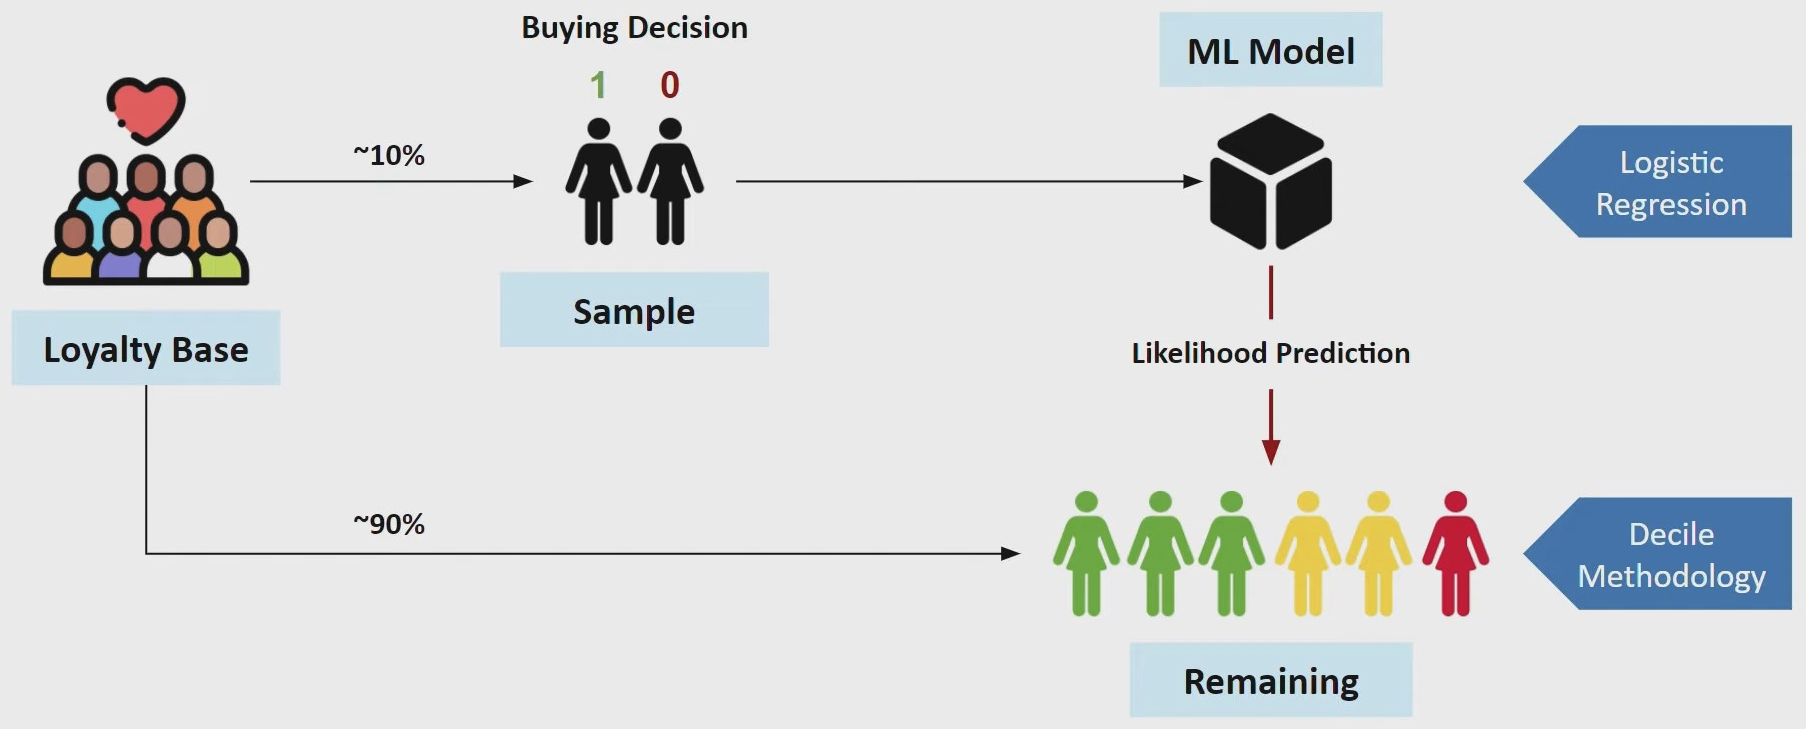
- Ajustist the threshold, in the Logistic Regression model, depends on the Business Objective

# Machine Learning model

## Importing data

In [6]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor

import joblib

In [7]:
dir = os.getcwd()
DSet = pd.read_excel(dir + '\\a1_Dataset_10Percent.xlsx')
DSet_BackUp = DSet.copy()
#DSet = DSet_BackUp.copy()

In [8]:
DSet.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,8415498,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,12107603,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,14400995,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,28724674,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


In [9]:
DSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemClusterGroup  21549 non-null  object 
 4   DemGender        19711 non-null  object 
 5   DemReg           21758 non-null  object 
 6   DemTVReg         21758 non-null  object 
 7   LoyalClass       22223 non-null  object 
 8   LoyalSpend       22223 non-null  float64
 9   LoyalTime        21942 non-null  float64
 10  TargetBuy        22223 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.9+ MB


In [10]:
DSet.describe(include = [np.number])

,ID,DemAffl,DemAge,LoyalSpend,LoyalTime,TargetBuy
count,2.222300e+04,21138.000000,20715.000000,22223.000000,21942.000000,22223.000000
mean,2.605540e+07,8.711893,53.797152,4420.590041,6.564670,0.247716
std,1.507497e+07,3.421125,13.206048,7559.047522,4.657113,0.431696
min,1.400000e+02,0.000000,18.000000,0.010000,0.000000,0.000000
25%,1.169402e+07,6.000000,44.000000,0.010000,4.000000,0.000000
50%,2.874879e+07,8.000000,54.000000,2000.000000,5.000000,0.000000
75%,3.745402e+07,11.000000,64.000000,6000.000000,8.000000,0.000000
max,5.285647e+07,34.000000,79.000000,296313.850000,39.000000,1.000000


In [11]:
DSet.describe(include = [object])

,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass
count,21549,19711,21758,21758,22223
unique,7,3,5,13,4
top,C,F,South East,London,Silver
freq,4566,12149,8634,6189,8572


## Data preparation

In [13]:
DSet.drop(['ID'], axis=1, inplace=True)

In [66]:
DSet.isna().sum()

DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
LoyalClass         0
LoyalSpend         0
LoyalTime          0
TargetBuy          0
dtype: int64

In [15]:
# Impute missing values:
# Categorical variables get mode()
DSet['DemAffl'] = DSet['DemAffl'].fillna(DSet['DemAffl'].mode()[0])
DSet['DemAge'] = DSet['DemAge'].fillna(DSet['DemAge'].mode()[0])
DSet['DemClusterGroup'] = DSet['DemClusterGroup'].fillna(DSet['DemClusterGroup'].mode()[0])
DSet['DemGender'] = DSet['DemGender'].fillna(DSet['DemGender'].mode()[0])
DSet['DemReg'] = DSet['DemReg'].fillna(DSet['DemReg'].mode()[0])
DSet['DemTVReg'] = DSet['DemTVReg'].fillna(DSet['DemTVReg'].mode()[0])

# Continuous variables get mean()
DSet['LoyalTime'] = DSet['LoyalTime'].fillna(DSet['LoyalTime'].mean())

## Coverting category to numerics

In [17]:
number = LabelEncoder()

DSet['DemClusterGroup'] = number.fit_transform(DSet['DemClusterGroup'].astype('str'))
integer_mapping = {l:i for i,l in enumerate(number.classes_)}
print(integer_mapping)

DSet['DemGender'] = number.fit_transform(DSet['DemGender'].astype('str'))
integer_mapping = {l:i for i,l in enumerate(number.classes_)}
print(integer_mapping)

DSet['DemReg'] = number.fit_transform(DSet['DemReg'].astype('str'))
integer_mapping = {l:i for i,l in enumerate(number.classes_)}
print(integer_mapping)

DSet['DemTVReg'] = number.fit_transform(DSet['DemTVReg'].astype('str'))
integer_mapping = {l:i for i,l in enumerate(number.classes_)}
print(integer_mapping)

DSet['LoyalClass'] = number.fit_transform(DSet['LoyalClass'].astype('str'))
integer_mapping = {l:i for i,l in enumerate(number.classes_)}
print(integer_mapping)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'U': 6}
{'F': 0, 'M': 1, 'U': 2}
{'Midlands': 0, 'North': 1, 'Scottish': 2, 'South East': 3, 'South West': 4}
{'Border': 0, 'C Scotland': 1, 'East': 2, 'London': 3, 'Midlands': 4, 'N East': 5, 'N Scot': 6, 'N West': 7, 'S & S East': 8, 'S West': 9, 'Ulster': 10, 'Wales & West': 11, 'Yorkshire': 12}
{'Gold': 0, 'Platinum': 1, 'Silver': 2, 'Tin': 3}


In [18]:
DSet.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,2,0,3,3,3,0.01,5.00000,0
1,15.0,51.0,2,1,3,3,0,8000.00,5.00000,1
2,8.0,51.0,2,1,0,2,3,0.01,6.56467,1
3,8.0,28.0,2,0,3,3,3,0.01,6.56467,1
4,14.0,67.0,2,0,3,3,3,0.01,7.00000,0


## Checking for Multicollinearity

We are looking for VIF (variance inflation factor) values lower than 10 for a good case for absence of multicollinearity.

In [20]:
def calc_vif(z):
    vif = pd.DataFrame()
    vif['variables'] = z.columns
    vif['VIF'] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [21]:
z = DSet.iloc[:, 0:9] #Select all columns except the one with the target values
calc_vif(z)

,variables,VIF
0,DemAffl,6.278630
1,DemAge,10.734656
2,DemClusterGroup,3.659632
3,DemGender,1.435472
4,DemReg,2.474645
5,DemTVReg,3.752279
6,LoyalClass,3.851766
7,LoyalSpend,1.863196
8,LoyalTime,3.153032


## Variable selection

In [23]:
y = DSet.iloc[:,9].values
X = DSet.iloc[:, 0:9].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Modelling

In [26]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [27]:
# Binary prediction
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [28]:
# Exporting model for production
#joblib.dump(classifier, '3_2_Classifier_LoyalCustomers')

In [29]:
# Evaluating the model
confusion_matrix(y_test, y_pred)

array([[3186,  181],
       [ 691,  387]], dtype=int64)

In [30]:
accuracy_score(y_test, y_pred)

0.8038245219347582

In [31]:
# Probabilistic prediction (the second column indicates the probability of buying)
predictions = classifier.predict_proba(X_test)
predictions

array([[0.86597782, 0.13402218],
       [0.65503342, 0.34496658],
       [0.49267282, 0.50732718],
       ...,
       [0.8925026 , 0.1074974 ],
       [0.91198607, 0.08801393],
       [0.8683001 , 0.1316999 ]])

In [32]:
# Exporting results
df_predictions_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_test_dataset = pd.DataFrame(y_test, columns = ['Actual Outcome'])
df_x_test = pd.DataFrame(X_test)
dfx = pd.concat([df_x_test, df_test_dataset, df_predictions_prob], axis=1)

dfx.head()

,0,1,2,3,4,5,6,7,8,Actual Outcome,prob_0,prob_1
0,10.0,58.0,3.0,1.0,3.0,8.0,0.0,12632.66,4.0,0,0.865978,0.134022
1,10.0,51.0,2.0,0.0,3.0,8.0,0.0,6000.00,6.0,0,0.655033,0.344967
2,16.0,65.0,1.0,0.0,2.0,6.0,0.0,6053.35,7.0,0,0.492673,0.507327
3,5.0,60.0,3.0,0.0,3.0,3.0,2.0,5000.00,1.0,0,0.909801,0.090199
4,9.0,52.0,3.0,0.0,0.0,4.0,2.0,3500.00,6.0,0,0.710377,0.289623


In [33]:
#dfx.to_excel('3_1_ModelOutput_10Porcent.xlsx')

# Predictor marketing - to the rest of 90% of customers

In [80]:
DSet_90 = pd.read_excel(dir + '\\a2_Dataset_90Percent.xlsx')

In [82]:
DSet_90.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime
0,140,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0
1,620,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0
2,868,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0
3,1120,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0
4,2313,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0


## Data preparation

In [85]:
DSet_90.drop(['ID'], axis=1, inplace=True)

In [87]:
# Impute missing values:
# Categorical variables get mode()
DSet_90['DemAffl'] = DSet_90['DemAffl'].fillna(DSet_90['DemAffl'].mode()[0])
DSet_90['DemAge'] = DSet_90['DemAge'].fillna(DSet_90['DemAge'].mode()[0])
DSet_90['DemClusterGroup'] = DSet_90['DemClusterGroup'].fillna(DSet_90['DemClusterGroup'].mode()[0])
DSet_90['DemGender'] = DSet_90['DemGender'].fillna(DSet_90['DemGender'].mode()[0])
DSet_90['DemReg'] = DSet_90['DemReg'].fillna(DSet_90['DemReg'].mode()[0])
DSet_90['DemTVReg'] = DSet_90['DemTVReg'].fillna(DSet_90['DemTVReg'].mode()[0])

# Continuous variables get mean()
DSet_90['LoyalTime'] = DSet_90['LoyalTime'].fillna(DSet_90['LoyalTime'].mean())

In [89]:
number = LabelEncoder()

DSet_90['DemClusterGroup'] = number.fit_transform(DSet_90['DemClusterGroup'].astype('str'))
integer_mapping = {l:i for i,l in enumerate(number.classes_)}
print(integer_mapping)

DSet_90['DemGender'] = number.fit_transform(DSet_90['DemGender'].astype('str'))
integer_mapping = {l:i for i,l in enumerate(number.classes_)}
print(integer_mapping)

DSet_90['DemReg'] = number.fit_transform(DSet_90['DemReg'].astype('str'))
integer_mapping = {l:i for i,l in enumerate(number.classes_)}
print(integer_mapping)

DSet_90['DemTVReg'] = number.fit_transform(DSet_90['DemTVReg'].astype('str'))
integer_mapping = {l:i for i,l in enumerate(number.classes_)}
print(integer_mapping)

DSet_90['LoyalClass'] = number.fit_transform(DSet_90['LoyalClass'].astype('str'))
integer_mapping = {l:i for i,l in enumerate(number.classes_)}
print(integer_mapping)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'U': 6}
{'F': 0, 'M': 1, 'U': 2}
{'Midlands': 0, 'North': 1, 'Scottish': 2, 'South East': 3, 'South West': 4}
{'Border': 0, 'C Scotland': 1, 'East': 2, 'London': 3, 'Midlands': 4, 'N East': 5, 'N Scot': 6, 'N West': 7, 'S & S East': 8, 'S West': 9, 'Ulster': 10, 'Wales & West': 11, 'Yorkshire': 12}
{'Gold': 0, 'Platinum': 1, 'Silver': 2, 'Tin': 3}


In [91]:
X_fresh = DSet_90.iloc[:, 0:9].values

## Prediction

In [97]:
classifier_fresh = joblib.load('3_2_Classifier_LoyalCustomers')

In [99]:
y_pred_fresh = classifier_fresh.predict(X_fresh)

In [101]:
y_pred_fresh

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [103]:
predictions_fresh = classifier_fresh.predict_proba(X_fresh)

In [105]:
predictions_fresh

array([[0.97659741, 0.02340259],
       [0.97402621, 0.02597379],
       [0.94481157, 0.05518843],
       ...,
       [0.96802621, 0.03197379],
       [0.76485026, 0.23514974],
       [0.50835121, 0.49164879]])

In [107]:
# Exporting results
df_predictions_prob_fresh = pd.DataFrame(predictions_fresh, columns = ['prob_0', 'prob_1'])
dfx_fresh = pd.concat([DSet_90 , df_predictions_prob_fresh], axis=1)

dfx_fresh.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,prob_0,prob_1
0,10.0,76.0,2,2,0,11,0,16000.00,4.0,0.976597,0.023403
1,4.0,49.0,3,2,0,11,0,6000.00,5.0,0.974026,0.025974
2,5.0,70.0,3,0,0,11,2,0.02,8.0,0.944812,0.055188
3,10.0,65.0,5,1,0,4,3,0.01,7.0,0.892210,0.107790
4,11.0,68.0,0,0,0,4,3,0.01,8.0,0.789243,0.210757


In [109]:
dfx_fresh.to_excel('4_2_BuyProb_90Percent.xlsx')

# Delivery presentation (highlights)

- Our deliverables to ABC Supermarket
    - Analytics-enabled marketing strategy to predict most probable buyers from ~90% loyalty program participants
    - With objective of optimizing profitability and market penetration
- Out approach
    - Assumptions
    - Trained a classification model
- Deliverable #1: Analytics-enabled marketing campaign
    - 81% accuracy
    - Zero operational cost to business
- Strategic marketing options for 90 percent Loyalty Base
    - No model scenario:
        - All 100% customers
        - Participants: 225,000
        - Profit Booked (in Mn INR): -176
    - (Max) Market penetration:
        - Top 40% customers
        - Participants: 90,000
        - Profit Booked (in Mn INR): 196
    - (Max) Profit:
        - Top 30% customers
        - Participants: 67,500
        - Profit Booked (in Mn INR): 214

---

# To improve:

- Use earlier train_test_split()
- Use of SimpleImputer() instead of fillna() | Data preparation
- Categorical Encoder() | Converting category to numeric
- Multicollineatity test and correction | Checking for Multicollinearity
- Scaling data
- Hyperparameters
- Export model for production (other library?)
- Evaluating the model
- Decile methodology and profit calculations
- Data preparation pipelines
- Implementation in production (Streamlit)